In [80]:
import numpy as np
import pandas as pd
import tgess
import os
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from tqdm.auto import tqdm
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, \
                            r2_score, mean_absolute_percentage_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, RationalQuadratic
from modAL.models import ActiveLearner
from tgess.src.data_science.plots import *
from tgess.src.data_science.experiment import *
import seaborn as sns
import matplotlib.pyplot as plt
from enum import Flag, IntFlag, auto

sns.set_theme()
sns.set_style("whitegrid")
tqdm.pandas()

ModuleNotFoundError: No module named 'helper_functions'

# Inner Mongolia grasslands

In [66]:
filename = "../data/raw/AGB/IMAR_grasslandAGBsamplingplots"

In [67]:
gdf = gpd.read_file(filename)

In [68]:
gdf["Date"]=gdf["Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
gdf["date_start"] = gdf["Date"].apply(lambda x: str(x - timedelta(days=30)))
gdf["date_end"] = gdf["Date"].apply(lambda x: str(x))
gdf

,Year,SPID,Long,Lat,DEM,AGB,Date,DOY,geometry,date_start,date_end
0,2013.0,178.0,111.217399,41.841417,1520.0,37.6,2013-08-05,217.0,POINT (111.21740 41.84142),2013-07-06,2013-08-05
1,2013.0,149.0,112.738834,42.680528,1105.0,25.6,2013-08-02,217.0,POINT (112.73883 42.68053),2013-07-03,2013-08-02
2,2013.0,220.0,109.422656,41.394393,1582.0,29.6,2013-08-08,225.0,POINT (109.42266 41.39439),2013-07-09,2013-08-08
3,2013.0,188.0,110.992610,42.327797,1168.0,30.4,2013-08-06,225.0,POINT (110.99261 42.32780),2013-07-07,2013-08-06
4,2013.0,30.0,113.857694,43.828553,1161.0,46.8,2013-07-31,217.0,POINT (113.85769 43.82855),2013-07-01,2013-07-31
5,2013.0,183.0,111.062783,42.040938,1254.0,54.0,2013-08-06,225.0,POINT (111.06278 42.04094),2013-07-07,2013-08-06
6,2013.0,214.0,109.740716,41.475922,1636.0,42.4,2013-08-08,225.0,POINT (109.74072 41.47592),2013-07-09,2013-08-08
7,2013.0,204.0,110.124626,41.978044,1368.0,39.2,2013-08-07,225.0,POINT (110.12463 41.97804),2013-07-08,2013-08-07
8,2013.0,80.0,116.066200,44.893391,896.0,79.2,2013-07-24,209.0,POINT (116.06620 44.89339),2013-06-24,2013-07-24
9,2013.0,35.0,113.422199,44.138099,1025.0,43.6,2013-07-31,217.0,POINT (113.42220 44.13810),2013-07-01,2013-07-31


## Download LANDSAT values

In [1]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AX4XfWhib5tr3RdptHYAXu1-xlCurtIvtYntd9WSvSle6jYtDf8PygcA3EU

Successfully saved authorization token.


In [70]:
band_cols = ["SR_B1", "SR_B2", "SR_B3", "SR_B4", "SR_B5", "ST_B6", "SR_B7"]
quality_col = "QA_PIXEL"

class QA_flag(IntFlag):
    dilated_cloud = 2**1
    cloud = 2**3
    cloud_shadow = 2**4
    snow = 2**5
    
def qa_flag_mask(x):
    return (QA_flag.dilated_cloud or QA_flag.cloud or QA_flag.cloud_shadow or QA_flag.snow) in QA_flag(x)

def create_reflectance_df(df, output_path, collection_name="LANDSAT/LC08/C02/T1_L2"):

    n_missing = 0
    for index, row in tqdm(df.iterrows(), total=len(df)):
        aoi = ee.Geometry.Point(lon=row["Long"], lat=row["Lat"])
        # Get all values within one month before or after
        collection = ee.ImageCollection(collection_name)\
                        .filterBounds(aoi)\
                        .filterDate(ee.Date(row["date_start"]), ee.Date(row["date_end"]))
                
        count = collection.size()
                       
        if count.getInfo()>0:
          
            # Retrieve properties as time series (list)
            zenith_angle = collection.aggregate_array("SUN_ELEVATION").getInfo()
            azimuth_angle = collection.aggregate_array("SUN_AZIMUTH").getInfo()
                       
            # Retrieve pixel values for region as time series (list of lists)
            
            values = collection.getRegion(geometry=aoi, scale=10)
            values = values.getInfo()
                        
            # Create dataframe
            values = pd.DataFrame(values)
            
            
            # First row is header
            values.columns = values.iloc[0]
            values = values[1:]
            
            values["index"] = index
            
            # Create columns for properties time series
            values["zenith_angle"] = np.repeat([90], repeats=len(zenith_angle)) - np.array(zenith_angle)
            values["azimuth_angle"] = azimuth_angle
            values["retrieval_datetime"] = pd.to_datetime(values["time"], unit='ms')
            values["in_situ_datetime"] = pd.to_datetime(row["Date"])
            
            # Filter by pixel quality
            mask = values["QA_PIXEL"].apply(qa_flag_mask)
            values = values[~mask]
                        
            # Select closest
            values["datetime_difference"] = (values["retrieval_datetime"] - values["in_situ_datetime"]).abs()
            values = values.sort_values(by=["datetime_difference"], ascending=True)
            
            # Append output to csv
            values = values.dropna()
        
            if len(values)>0:
                pd.DataFrame(values.iloc[0]).T.to_csv(output_path, mode="a", header=not os.path.exists(output_path))
            
        else:
            print("Missing data for row {}".format(index))
            n_missing +=1

        sleep(0.1)
        
    print(n_missing)
    return

In [74]:
output_path = "mongolia_landsat.csv"
create_reflectance_df(gdf, output_path, collection_name="LANDSAT/LC08/C02/T1_L2")

  0%|          | 0/46 [00:00<?, ?it/s]

0


In [77]:
out_df = pd.read_csv(output_path)
out_df.columns

Index(['Unnamed: 0', 'id', 'longitude', 'latitude', 'time', 'SR_B1', 'SR_B2',
       'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'SR_B6', 'SR_QA_AEROSOL', 'ST_B10',
       'ST_ATRAN', 'ST_CDIST', 'ST_DRAD', 'ST_EMIS', 'ST_EMSD', 'ST_QA',
       'ST_TRAD', 'ST_URAD', 'QA_PIXEL', 'QA_RADSAT', 'index', 'zenith_angle',
       'azimuth_angle', 'retrieval_datetime', 'in_situ_datetime',
       'datetime_difference'],
      dtype='object')

In [78]:
out_df

,Unnamed: 0,id,longitude,latitude,time,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,...,ST_TRAD,ST_URAD,QA_PIXEL,QA_RADSAT,index,zenith_angle,azimuth_angle,retrieval_datetime,in_situ_datetime,datetime_difference
0,1,LC08_127031_20130711,111.217406,41.841415,1373512790020,19499,19720,20436,21802,25880,...,6228,2063,55052,0,0,26.075467,132.661606,2013-07-11 03:19:50.020,2013-08-05 00:00:00.000,24 days 20:40:09.980000
1,2,LC08_126030_20130720,112.738793,42.680531,1374289993463,9982,10670,12717,14383,18892,...,11518,2007,21824,0,1,28.189328,136.703829,2013-07-20 03:13:13.463,2013-08-02 00:00:00.000,12 days 20:46:46.537000
2,2,LC08_128031_20130803,109.422662,41.394413,1375500361803,9746,10434,12347,14043,17031,...,11339,1396,21824,0,2,29.997094,137.856185,2013-08-03 03:26:01.803,2013-08-08 00:00:00.000,4 days 20:33:58.197000
3,1,LC08_127031_20130711,110.992647,42.327763,1373512790020,11297,12483,15455,17388,22135,...,10707,2251,21824,0,3,26.075467,132.661606,2013-07-11 03:19:50.020,2013-08-06 00:00:00.000,25 days 20:40:09.980000
4,2,LC08_125030_20130729,113.857734,43.828578,1375067224581,10127,10844,12988,14885,19449,...,11521,1408,21824,0,4,29.837824,138.713502,2013-07-29 03:07:04.581,2013-07-31 00:00:00.000,1 days 20:52:55.419000
5,1,LC08_127031_20130711,111.062806,42.040931,1373512790020,9168,10458,13454,14591,18508,...,7627,2225,22280,0,5,26.075467,132.661606,2013-07-11 03:19:50.020,2013-08-06 00:00:00.000,25 days 20:40:09.980000
6,3,LC08_128031_20130803,109.740755,41.475890,1375500361803,9961,10521,12274,13913,16885,...,11120,1374,21824,0,6,29.997094,137.856185,2013-08-03 03:26:01.803,2013-08-08 00:00:00.000,4 days 20:33:58.197000
7,3,LC08_128031_20130803,110.124605,41.978049,1375500361803,9814,10440,12198,13573,16697,...,11030,1543,21824,0,7,29.997094,137.856185,2013-08-03 03:26:01.803,2013-08-07 00:00:00.000,3 days 20:33:58.197000
8,2,LC08_124029_20130722,116.066242,44.893351,1374462027618,40979,41300,39550,39696,39861,...,5286,3086,55052,0,8,29.399111,139.470685,2013-07-22 03:00:27.618,2013-07-24 00:00:00.000,1 days 20:59:32.382000
9,2,LC08_126029_20130720,113.422231,44.138138,1374289969580,10302,10992,13192,15142,18378,...,11651,1771,21824,0,9,29.053927,139.117529,2013-07-20 03:12:49.580,2013-07-31 00:00:00.000,10 days 20:47:10.420000


In [79]:
simulation_df = pd.read_csv("../data/processed/PROSAIL_LUT_S2_100000_generic.csv")

# Uganda national biomass survey

In [6]:
filename = "../data/raw/AGB/NFI_NBS_FIX/NFI_NBS_FIX.shp"
gdf = gpd.read_file(filename)
gdf[gdf["PlotType"]=="NBS"]

,cat,PlotNo,x,Y,PlotType,VisitNo,MeasureDat,N_year,geometry
0,1,112011,270000,370000,NBS,3,9/26/2008,2008,POINT (30.92999 3.34527)
1,2,112013,270000,369700,NBS,1,9/26/2008,2008,POINT (30.93000 3.34256)
2,3,112017,270000,369400,NBS,1,9/26/2008,2008,POINT (30.93001 3.33985)
3,4,112021,270000,365000,NBS,2,5/15/2007,2007,POINT (30.93009 3.30007)
4,5,112021,270000,365000,NBS,3,9/25/2008,2008,POINT (30.93009 3.30007)
...,...,...,...,...,...,...,...,...,...
4400,4401,943044,180300,-140000,NBS,3,5/31/2005,2005,POINT (30.12745 -1.26502)
4401,4402,943046,180000,-139400,NBS,3,5/31/2005,2005,POINT (30.12476 -1.25960)
4402,4403,943051,180000,-145000,NBS,3,6/2/2005,2005,POINT (30.12471 -1.31020)
4403,4404,943052,180000,-144700,NBS,3,6/2/2005,2005,POINT (30.12471 -1.30749)


In [3]:
filename = "../data/raw/AGB/squarenbs_2018/squarenbs_2018.shp"
gdf = gpd.read_file(filename)
gdf
# gdf[gdf["PlotType"]=="NBS"]

,PlotNo,Latitude,Longitude,geometry
0,383032,1.539901,31.112457,POINT (31.11246 1.53990)
1,383033,1.534513,31.112428,POINT (31.11243 1.53451)
2,383037,1.531790,31.112448,POINT (31.11245 1.53179)
3,384021,1.672989,31.292052,POINT (31.29205 1.67299)
4,384023,1.670282,31.292029,POINT (31.29203 1.67028)
...,...,...,...,...
91,602045,0.859454,32.278325,POINT (32.27833 0.85945)
92,602046,0.864789,32.280908,POINT (32.28091 0.86479)
93,602051,0.814193,32.281007,POINT (32.28101 0.81419)
94,602052,0.816907,32.281007,POINT (32.28101 0.81691)


# Poyang Lake Wetlands
https://www.frontiersin.org/articles/10.3389/fpls.2019.01281/full

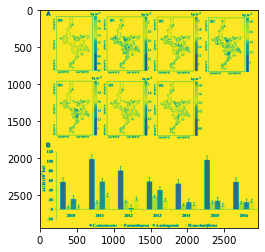

In [7]:
filename = "../data/raw/AGB/fpls-10-01281-g008.tif"

import xarray as xr
data = xr.open_rasterio(filename)
plt.imshow(data[0])

# Other

In [4]:
filename = "../data/raw/AGB/CLIMAFRICA_Sampling_Plots/Congo_Sampling_Points.shp"
gdf = gpd.read_file(filename)
gdf

,CODE,X,Y,Type,Village,geometry
0,CO-KKO-02,174343,9483944,Biophysical,None,POINT (174343.000 9483944.000)
1,CO-KKO-03,175252,9476342,Biophysical,None,POINT (175252.000 9476342.000)
2,CO-KKO-04,171430,9471446,Biophysical,None,POINT (171430.000 9471446.000)
3,CO-KKO-05,170202,9470168,Biophysical,None,POINT (170202.000 9470168.000)
4,CO-KKO-06,174668,9474366,Biophysical,None,POINT (174668.000 9474366.000)
5,CO-KKO-07,173912,9476580,Biophysical,None,POINT (173912.000 9476580.000)
6,CO-KKO-08,176457,9477850,Biophysical,None,POINT (176457.000 9477850.000)
7,CO-KKO-00,164862,9469998,Biophysical,None,POINT (164861.818 9469997.705)
8,CO-KKO-01,166067,9466812,Biophysical,None,POINT (166066.854 9466812.066)
9,CO-TCH-00,124473,9522909,Biophysical,None,POINT (124472.859 9522909.452)


In [5]:
filename = "../data/raw/AGB/biomass/biomass.shp"
gdf = gpd.read_file(filename)
gdf

,OBJECTID,STATE,name_arabi,Shape_Leng,Shape_Area,Av_Vol_h,To_Vol,Av_AGB_t_h,Tot_AGB_t,geometry
0,18.0,Al Gezira,Ø§ÙØ¬Ø²ÙØ±Ø©,8.787811,27229.194796,0.000000,NaN,NaN,NaN,"POLYGON ((33.56922 15.45538, 33.57492 15.43839..."
1,1.0,Blue Nile,Ø§ÙÙÙÙ Ø§ÙØ§Ø²,8.844899,38150.326423,7.122431,1.856574e+07,5.212932,1.358833e+07,"POLYGON ((35.05032 11.74069, 35.05232 11.73329..."
2,6.0,Khartoum,Ø§ÙØ®Ø±Ø·ÙÙ,7.404397,21206.776142,0.254944,1.542380e+06,0.250999,1.518511e+06,"POLYGON ((33.43582 16.11349, 33.51042 16.05459..."
3,11.0,River Nile,ÙÙØ± Ø§ÙÙÙÙ,17.850992,129627.563602,0.074450,3.429059e+05,0.054533,2.511678e+05,"POLYGON ((33.55376 21.72248, 33.54533 21.72142..."
4,7.0,Northern,Ø§ÙØ´Ù Ø§ÙÙØ©,26.188226,365484.400368,2.186194,1.546313e+06,1.539044,1.088579e+06,"POLYGON ((32.41512 21.93739, 32.39432 21.30599..."
5,9.0,North Kordofan,Ø´Ù Ø§Ù ÙØ±Ø¯ÙØ§,19.179364,187649.513122,0.957305,1.444344e+07,0.843617,1.272816e+07,"POLYGON ((29.78812 12.74259, 29.78819 12.74765..."
6,12.0,Sennar,Ø³ÙØ§Ø±,12.368708,39355.888610,3.969588,9.141753e+06,3.727829,8.584995e+06,"POLYGON ((33.85962 14.03019, 33.92652 14.00589..."
7,14.0,South Kordofan,Ø¬ÙÙØ¨ ÙØ±Ø¯ÙØ§,11.197204,78460.994599,9.577795,4.169210e+07,7.623777,3.318627e+07,"POLYGON ((29.94703 10.29220, 29.94430 10.29716..."
8,17.0,White Nile,Ø§ÙÙÙÙ Ø§ÙØ§Ø¨,10.487477,37956.462026,0.024784,1.054921e+05,0.022534,9.591516e+04,"POLYGON ((32.54870 15.20120, 32.54050 15.17870..."
9,5.0,Kassala,ÙØ³ÙØ§,11.347523,51369.646919,0.048747,1.370527e+05,0.048338,1.359030e+05,"POLYGON ((36.64436 17.00747, 36.75853 17.00274..."


In [6]:
filename = "../data/raw/AGB/sugarcane_data/GIS Layers/Fields.shp"
gdf = gpd.read_file(filename)
gdf

,Field name,Variety,Ratoon,Harvesting,Area [ha],Perim. [m],geometry
0,F3,SP80-3280,2nd cycle,August,25,2004,"POLYGON ((-47.52470 -22.87121, -47.52469 -22.8..."
1,F2,SP80-3280,1st cycle,October,115,6030,"POLYGON ((-47.42327 -22.85055, -47.42327 -22.8..."
2,F1,RB867515,1st cycle,October,58,8342,"POLYGON ((-47.45328 -22.97049, -47.45328 -22.9..."
3,F4,SP80-3280,9th cycle,August,59,3921,"POLYGON ((-47.50940 -22.89051, -47.50940 -22.8..."
